# **CAPSTONE PROJECT - Classification Pose for Stroke Rehabilitation**

---

## **3. Data Understanding**

Proyek ini menggunakan dataset . Dataset ini berisi  gambar , dimana gambar dikategorikan sebagai . Dataset ini dapat diunduh di sini

## **4. Data Loading**
Tahap ini merupakan tahapan mengakses data, seperti menyiapkan library dan akses terhadap datasetnya.

**4.1. Mengimpor Library yang akan digunakan**

In [ ]:
import tensorflow as tf 
import cv2 
import os
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [ ]:
import zipfile
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

**4.2. Mengunduh Dataset**

In [ ]:
!wget --no-check-certificate \
    "https://drive.google.com/u/0/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t" \
    -O "/tmp/data.zip"

local_zip = '/tmp/data.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-06-10 05:06:07--  https://drive.google.com/u/0/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t
Resolving drive.google.com (drive.google.com)... 172.217.164.142, 2607:f8b0:4004:c09::8b, 2607:f8b0:4004:c09::71, ...
Connecting to drive.google.com (drive.google.com)|172.217.164.142|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t [following]
--2022-06-10 05:06:07--  https://drive.google.com/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a2t1h2g9a1ncs1kjhntujlbblksfs6km/1654837500000/10501907559150766263/*/16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58?e=download [following]
--2022-06-10 05:06:07--  https://doc-0s-6c-docs.googleusercont

**4.3. Mengakses Direktori Dataset yang akan digunakan**

In [ ]:
root_dir = '/tmp/faces'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):

  os.makedirs(root_path + '/training')
  os.makedirs(root_path + '/validation')
  os.makedirs(root_path + '/training/open-mouth')
  os.makedirs(root_path + '/training/puff-cheeck')
  os.makedirs(root_path + '/training/show-teeth')
  os.makedirs(root_path + '/training/smile')
  os.makedirs(root_path + '/training/sneer')
  
  os.makedirs(root_path + '/validation/open-mouth')
  os.makedirs(root_path + '/validation/puff-cheeck')
  os.makedirs(root_path + '/validation/show-teeth')
  os.makedirs(root_path + '/validation/smile')
  os.makedirs(root_path + '/validation/sneer')

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/faces/training
/tmp/faces/validation
/tmp/faces/training/open-mouth
/tmp/faces/training/smile
/tmp/faces/training/sneer
/tmp/faces/training/show-teeth
/tmp/faces/training/puff-cheeck
/tmp/faces/validation/open-mouth
/tmp/faces/validation/smile
/tmp/faces/validation/sneer
/tmp/faces/validation/show-teeth
/tmp/faces/validation/puff-cheeck


**4.4. Membagi Dataset menjadi data train dan validasi dengan komposisi 7:3**

In [ ]:
# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  files = []
  for path in os.listdir(SOURCE_DIR):
    if os.path.getsize(SOURCE_DIR + path) > 0:
      files.append(SOURCE_DIR + path)
    else:
      print(path+' is zero length, so ignoring.')


  random_trainfile = random.sample(files, int(SPLIT_SIZE*len(files)))

  for path in random_trainfile:
    copyfile(SOURCE_DIR + path[path.rfind('/')+1 : ], TRAINING_DIR + path[path.rfind('/')+1 : ])

  random_testingfiles = list(set(files)-set(random_trainfile))
  random_testingfile = random.sample(random_testingfiles, len(random_testingfiles))
  
  for path in random_testingfile:
    copyfile(SOURCE_DIR + path[path.rfind('/')+1 : ], VALIDATION_DIR + path[path.rfind('/')+1 : ])


In [ ]:

om_dir = "/tmp/face/open-mouth/"
smile_dir = "/tmp/face/smile/"
puff_dir = "/tmp/face/puff-cheeks/"
show_dir = "/tmp/face/show-teeth/"
sneer_dir = "/tmp/face/sneer-on-one-side/"

TRAINING_DIR = "/tmp/faces/training/"
VALIDATION_DIR = "/tmp/faces/validation/"

TRAINING_SMILE_DIR = os.path.join(TRAINING_DIR, "smile/")
VALIDATION_SMILE_DIR = os.path.join(VALIDATION_DIR, "smile/")

TRAINING_sneer_DIR = os.path.join(TRAINING_DIR, "sneer/")
VALIDATION_sneer_DIR = os.path.join(VALIDATION_DIR, "sneer/")

TRAINING_show_DIR = os.path.join(TRAINING_DIR, "show-teeth/")
VALIDATION_show_DIR = os.path.join(VALIDATION_DIR, "show-teeth/")

TRAINING_puff_DIR = os.path.join(TRAINING_DIR, "puff-cheeck/")
VALIDATION_puff_DIR = os.path.join(VALIDATION_DIR, "puff-cheeck/")

TRAINING_open_DIR = os.path.join(TRAINING_DIR, "open-mouth/")
VALIDATION_open_DIR = os.path.join(VALIDATION_DIR, "open-mouth/")

if len(os.listdir(TRAINING_SMILE_DIR)) > 0:
  for file in os.scandir(TRAINING_SMILE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_sneer_DIR)) > 0:
  for file in os.scandir(TRAINING_sneer_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_show_DIR)) > 0:
  for file in os.scandir(TRAINING_show_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_puff_DIR)) > 0:
  for file in os.scandir(TRAINING_puff_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_open_DIR)) > 0:
  for file in os.scandir(TRAINING_open_DIR):
    os.remove(file.path)


if len(os.listdir(VALIDATION_SMILE_DIR)) > 0:
  for file in os.scandir(VALIDATION_SMILE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_sneer_DIR)) > 0:
  for file in os.scandir(VALIDATION_sneer_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_show_DIR)) > 0:
  for file in os.scandir(VALIDATION_show_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_puff_DIR)) > 0:
  for file in os.scandir(VALIDATION_puff_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_open_DIR)) > 0:
  for file in os.scandir(VALIDATION_open_DIR):
    os.remove(file.path)

split_size = .8

split_data(om_dir, TRAINING_open_DIR, VALIDATION_open_DIR, split_size)
split_data(smile_dir, TRAINING_SMILE_DIR, VALIDATION_SMILE_DIR, split_size)
split_data(puff_dir, TRAINING_puff_DIR, VALIDATION_puff_DIR, split_size)
split_data(show_dir, TRAINING_show_DIR, VALIDATION_show_DIR, split_size)
split_data(sneer_dir, TRAINING_sneer_DIR, VALIDATION_sneer_DIR, split_size)

## **5. Data Pre-processing dan Data Augmentation**
Tahap ini merupakan tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan.

In [ ]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  train_datagen = ImageDataGenerator(rescale=1/255
                                    ,rotation_range=40,
                                     width_shift_range=0.25,
                                     height_shift_range=0.25,
                                     shear_range=0.25,
                                     zoom_range=0.25,
                                     horizontal_flip=True,
                                     fill_mode='nearest'
                                     )
  
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=25,
                                                      class_mode='categorical',
                                                      shuffle=True,
                                                      target_size=(224, 224))

  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=25,
                                                                shuffle=True,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  return train_generator, validation_generator

In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 720 images belonging to 5 classes.
Found 180 images belonging to 5 classes.


## **6. Modeling**

Pada tahap ini, kita akan mengembangkan model machine learning dengan algoritma convolutional neural network (CNN) dari MobileNetV2

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
pre_trained_model = tf.keras.applications.xception.Xception(input_shape = (224, 224, 3),
                                include_top = False, 
                                weights = 'imagenet' ).
for layer in pre_trained_model.layers:
  layer.trainable = False

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
last_layer = pre_trained_model.get_layer('block14_sepconv2_act')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 2048)


In [ ]:
from tensorflow.keras import Model

x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (5, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

**Menggunakan Callback**

In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.87) and (logs.get('accuracy')>0.9):
      print("\nReached 0.87 % val accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callback = myCallback()
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer = Adam(learning_rate=0.001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## **7. Training Model**

In [ ]:
# callbacks = myCallback()
history = model.fit(
            train_generator,
                    steps_per_epoch = 5,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callback]
                    #callbacks=[callback]
                    )


Epoch 1/50
5/5 [==============================] - 19s 923ms/step - loss: 18.5421 - accuracy: 0.2240 - val_loss: 25.0178 - val_accuracy: 0.2333
Epoch 2/50
5/5 [==============================] - 3s 594ms/step - loss: 24.6337 - accuracy: 0.2960 - val_loss: 9.6352 - val_accuracy: 0.3944
Epoch 3/50
5/5 [==============================] - 3s 590ms/step - loss: 10.3993 - accuracy: 0.3200 - val_loss: 8.4153 - val_accuracy: 0.3333
Epoch 4/50
5/5 [==============================] - 3s 574ms/step - loss: 8.6962 - accuracy: 0.3760 - val_loss: 4.9689 - val_accuracy: 0.5000
Epoch 5/50
5/5 [==============================] - 3s 580ms/step - loss: 5.9377 - accuracy: 0.4400 - val_loss: 2.8933 - val_accuracy: 0.5167
Epoch 6/50
5/5 [==============================] - 3s 567ms/step - loss: 4.0108 - accuracy: 0.4560 - val_loss: 2.7641 - val_accuracy: 0.4833
Epoch 7/50
5/5 [==============================] - 3s 609ms/step - loss: 4.2212 - accuracy: 0.4160 - val_loss: 3.1671 - val_accuracy: 0.4556
Epoch 8/50
5/5 

In [ ]:
model.evaluate(validation_generator)
model.evaluate(train_generator)

29/29 [==============================] - 11s 361ms/step - loss: 0.8486 - accuracy: 0.6694


[0.8485512733459473, 0.6694444417953491]

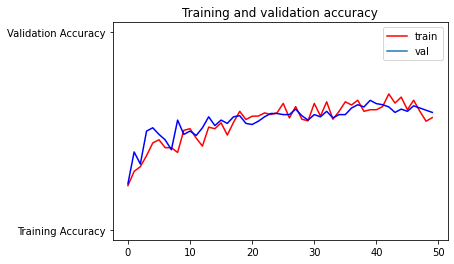

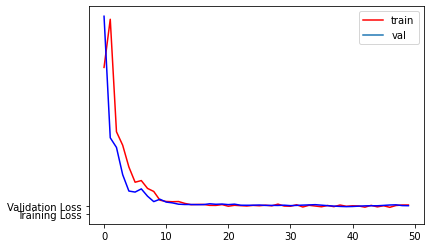

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input

Saving WhatsApp Image 2022-06-07 at 1.00.43 PM (1).jpeg to WhatsApp Image 2022-06-07 at 1.00.43 PM (1).jpeg
Saving WhatsApp Image 2022-06-07 at 1.00.43 PM (2).jpeg to WhatsApp Image 2022-06-07 at 1.00.43 PM (2).jpeg
Saving WhatsApp Image 2022-06-07 at 1.00.43 PM (3).jpeg to WhatsApp Image 2022-06-07 at 1.00.43 PM (3).jpeg
Saving WhatsApp Image 2022-06-07 at 1.00.43 PM.jpeg to WhatsApp Image 2022-06-07 at 1.00.43 PM.jpeg
Saving WhatsApp Image 2022-06-07 at 1.00.44 PM.jpeg to WhatsApp Image 2022-06-07 at 1.00.44 PM.jpeg
Saving WhatsApp Image 2022-06-07 at 11.46.22 AM.jpeg to WhatsApp Image 2022-06-07 at 11.46.22 AM.jpeg
Saving WhatsApp Image 2022-06-07 at 11.46.23 AM (1).jpeg to WhatsApp Image 2022-06-07 at 11.46.23 AM (1).jpeg
Saving WhatsApp Image 2022-06-07 at 11.46.23 AM.jpeg to WhatsApp Image 2022-06-07 at 11.46.23 AM.jpeg
Saving WhatsApp Image 2022-06-07 at 11.46.24 AM (1).jpeg to WhatsApp Image 2022-06-07 at 11.46.24 AM (1).jpeg
Saving WhatsApp Image 2022-06-07 at 11.46.24 AM.jpeg

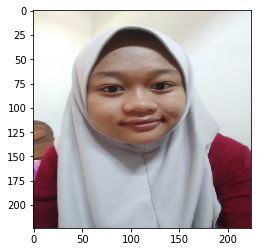

open-mouth: 29.74%
puff-cheeck: 10.79%
show-teeth: 33.43%
smile: 7.03%
sneer: 19.02%


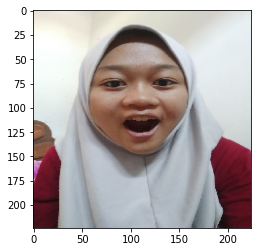

open-mouth: 46.61%
puff-cheeck: 6.65%
show-teeth: 30.03%
smile: 4.41%
sneer: 12.30%


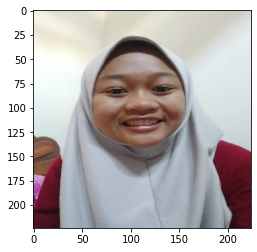

open-mouth: 18.93%
puff-cheeck: 5.14%
show-teeth: 51.95%
smile: 8.19%
sneer: 15.79%


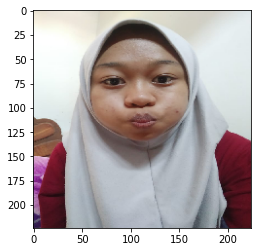

open-mouth: 7.91%
puff-cheeck: 30.73%
show-teeth: 9.39%
smile: 15.33%
sneer: 36.64%


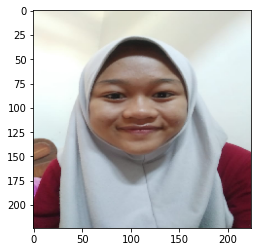

open-mouth: 29.54%
puff-cheeck: 6.94%
show-teeth: 42.15%
smile: 6.25%
sneer: 15.12%


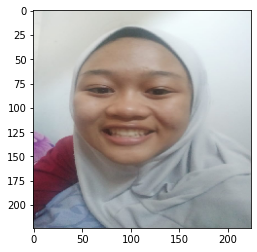

open-mouth: 41.46%
puff-cheeck: 3.35%
show-teeth: 44.24%
smile: 2.94%
sneer: 8.01%


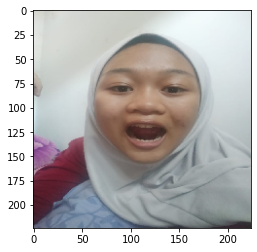

open-mouth: 43.74%
puff-cheeck: 3.90%
show-teeth: 38.54%
smile: 3.17%
sneer: 10.65%


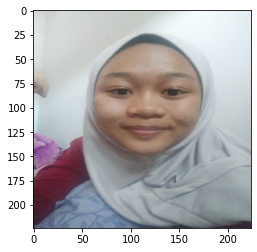

open-mouth: 34.84%
puff-cheeck: 3.81%
show-teeth: 46.64%
smile: 3.64%
sneer: 11.06%


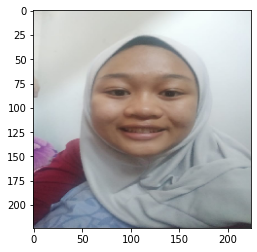

open-mouth: 26.81%
puff-cheeck: 2.09%
show-teeth: 53.19%
smile: 4.26%
sneer: 13.65%


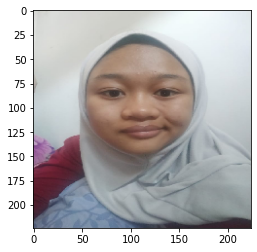

open-mouth: 28.86%
puff-cheeck: 4.22%
show-teeth: 50.91%
smile: 4.37%
sneer: 11.63%


In [ ]:
labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  path = paths
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))